# Detecção de objetos com YOLO (V4)  e Darknet
Para esse projeto foi utilizado o material constante no próprio repositório Darknet para fazer as detecções, sendo adionado, após a detecção, a leitura dos itens encontrados em aúdio.

### 1 - Clona o repositório do Darknet

In [ ]:
!git clone https://github.com/AlexeyAB/darknet

In [ ]:
cd darknet

### 2 - Compila a biblioteca




In [ ]:
!make

### 3 - Download dos pesos do modelo pré-treinado

In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

### 4 - Rodando o detector utilizando o executável quem vem com a biblioteca
A saída do programa é enviada para um arquivo txt que será lido para informar os itens encontrados na imagem através de áudio.

In [ ]:
!./darknet detect cfg/yolov4.cfg yolov4.weights data/white_cat_and_dog.jpg > data.txt


### 5 - Visualizando o resultado com o OpenCV e Matplotlib
É necessário a instalação da biblioteca gTTS para a geração do aúdio final com os itens encontrados

In [ ]:
!pip install gTTS

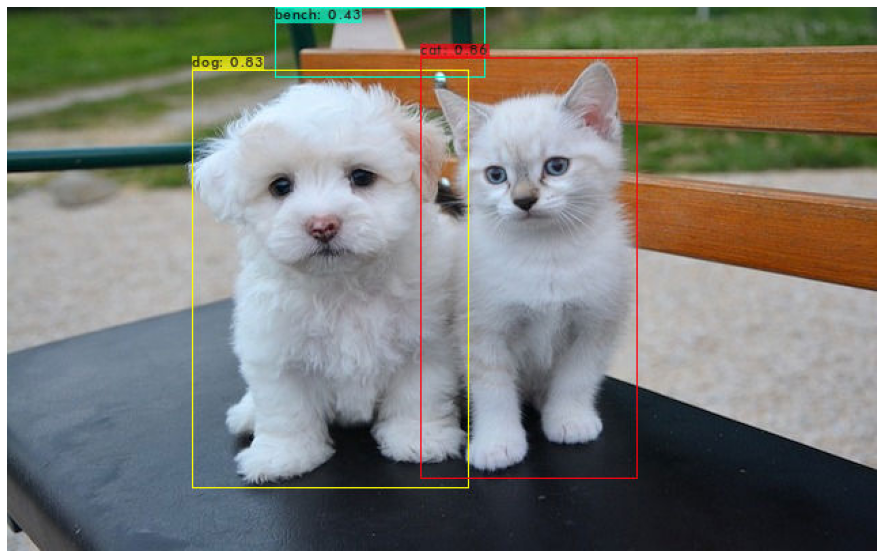

In [54]:
import cv2
import matplotlib.pyplot as plt
from gtts import gTTS
from IPython.display import Audio

imagem = cv2.imread('predictions.jpg')
fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis('off')
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
plt.show()


### 6 - Abre o arquivo com a saída do processamento e pega os objetos detectados

In [56]:

inicio = 11 #os objetos vão estar sempre a partir dessa linha
encontrados = []
with open('data.txt') as data:
  for objeto in data.readlines()[inicio:]:
    encontrados.append(objeto.split(':')[0])
anuncio = "The analyzed image contains the following items,  "
lista = ", ".join(encontrados)
audio = gTTS(anuncio+lista)
audio.save('2.wav')

Audio('2.wav', autoplay=True)